# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train .csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
int_col =[]
float_col = []
for col in app_train:
    if app_train[col].dtype == 'int64' and len(list(app_train[col].unique())) > 2 :
        int_col.append(col)
    elif app_train[col].dtype == 'float64' and len(list(app_train[col].unique())) > 2 :
        float_col.append(col)
print(f'float_col : {len(float_col)}')
print(f'int_col : {len(int_col)}')


float_col : 66
int_col : 7


In [7]:
app_train[int_col]

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START
0,100002,0,9461,-2120,2,2,10
1,100003,0,16765,-291,1,1,11
2,100004,0,19046,-2531,2,2,9
3,100006,0,19005,-2437,2,2,17
4,100007,0,19932,-3458,2,2,11
...,...,...,...,...,...,...,...
307506,456251,0,9327,-1982,1,1,15
307507,456252,0,20775,-4090,2,2,8
307508,456253,0,14966,-5150,3,3,9
307509,456254,0,11961,-931,2,2,9


In [32]:
age_data = app_train.loc[:,['DAYS_BIRTH','TARGET' , 'AMT_INCOME_TOTAL']]
age_data

,DAYS_BIRTH,TARGET,AMT_INCOME_TOTAL
0,9461,1,202500.0
1,16765,0,270000.0
2,19046,0,67500.0
3,19005,0,135000.0
4,19932,0,121500.0
...,...,...,...
307506,9327,0,157500.0
307507,20775,0,72000.0
307508,14966,0,153000.0
307509,11961,1,171000.0


In [33]:
age_data['age'] = round(age_data['DAYS_BIRTH'] / 365 , 0)
age_data['age_rg'] = pd.cut(age_data['age'] , 10)
age_data

,DAYS_BIRTH,TARGET,AMT_INCOME_TOTAL,age,age_rg
0,9461,1,202500.0,26.0,"(25.8, 30.6]"
1,16765,0,270000.0,46.0,"(45.0, 49.8]"
2,19046,0,67500.0,52.0,"(49.8, 54.6]"
3,19005,0,135000.0,52.0,"(49.8, 54.6]"
4,19932,0,121500.0,55.0,"(54.6, 59.4]"
...,...,...,...,...,...
307506,9327,0,157500.0,26.0,"(25.8, 30.6]"
307507,20775,0,72000.0,57.0,"(54.6, 59.4]"
307508,14966,0,153000.0,41.0,"(40.2, 45.0]"
307509,11961,1,171000.0,33.0,"(30.6, 35.4]"


In [34]:
import seaborn as sns
age_mean = age_data.groupby('age_rg').mean()
age_mean

,DAYS_BIRTH,TARGET,AMT_INCOME_TOTAL,age
age_rg,,,,
"(20.952, 25.8]",8631.638289,0.121086,147203.270907,23.609512
"(25.8, 30.6]",10309.381867,0.111727,165877.981763,28.232196
"(30.6, 35.4]",12033.562106,0.100854,178895.654746,32.969751
"(35.4, 40.2]",13881.443587,0.088413,179522.520187,38.027623
"(40.2, 45.0]",15671.045164,0.077393,182158.475286,42.940963
"(45.0, 49.8]",17321.795522,0.075103,179739.311735,47.465708
"(49.8, 54.6]",19004.549121,0.068183,172156.186545,52.066529
"(54.6, 59.4]",20783.840110,0.055968,159741.063120,56.952104
"(59.4, 64.2]",22581.907145,0.052691,146194.089291,61.875933


/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rg', ylabel='TARGET'>

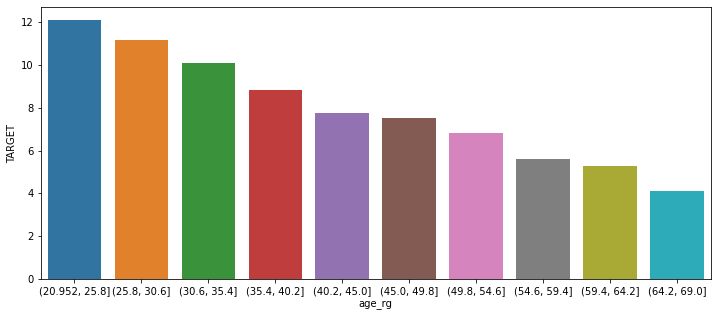

In [39]:
plt.figure(figsize=(12 , 5))
sns.barplot(age_mean.index , age_mean['TARGET'] * 100)


/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rg', ylabel='AMT_INCOME_TOTAL'>

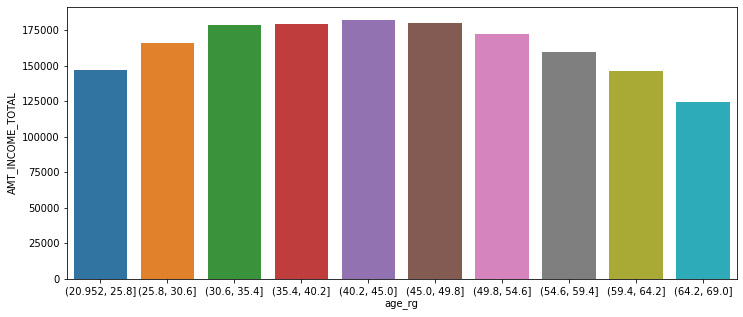

In [45]:
plt.figure(figsize=(12 , 5))
sns.barplot(age_mean.index , age_mean['AMT_INCOME_TOTAL']  )


In [52]:
income_data = app_train.loc[: , ['AMT_INCOME_TOTAL' , 'TARGET']]
income_data

,AMT_INCOME_TOTAL,TARGET
0,202500.0,1
1,270000.0,0
2,67500.0,0
3,135000.0,0
4,121500.0,0
...,...,...
307506,157500.0,0
307507,72000.0,0
307508,153000.0,0
307509,171000.0,1


In [71]:
income_data['income_group'] = pd.qcut(income_data['AMT_INCOME_TOTAL'] , 10)
income_group = income_data.groupby('income_group').mean()
income_group

,AMT_INCOME_TOTAL,TARGET
income_group,,
"(25649.999, 81000.0]",66254.124685,0.081908
"(81000.0, 99000.0]",91089.278813,0.082232
"(99000.0, 112500.0]",111333.276330,0.087192
"(112500.0, 135000.0]",131852.488657,0.084894
"(135000.0, 147150.0]",142953.056026,0.090007
"(147150.0, 162000.0]",157141.512098,0.086407
"(162000.0, 180000.0]",178061.632269,0.084224
"(180000.0, 225000.0]",212733.495347,0.078065
"(225000.0, 270000.0]",259491.085277,0.070401


/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='TARGET'>

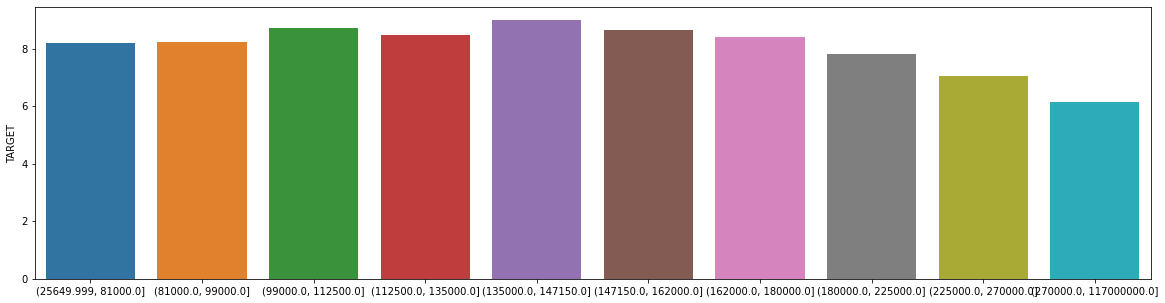

In [73]:
plt.figure(figsize=(20 , 5))
sns.barplot(np.sort(income_group.index) , income_group['TARGET'] * 100  )

In [87]:
corr_data = app_train.corr()['TARGET']

In [94]:
corr_data = pd.DataFrame(corr_data).drop('TARGET').reset_index().rename(columns={'index':'col' , 'TARGET':'corr'})
corr_data.max()

col     YEARS_BUILD_MODE
corr           0.0749585
dtype: object

In [105]:
corr_data[corr_data['corr'].abs() > 0.05].sort_values('corr' , ascending=False)

,col,corr
11,DAYS_EMPLOYED,0.074958
23,REGION_RATING_CLIENT_W_CITY,0.060893
22,REGION_RATING_CLIENT,0.058899
81,DAYS_LAST_PHONE_CHANGE,0.055218
13,DAYS_ID_PUBLISH,0.051457
29,REG_CITY_NOT_WORK_CITY,0.050994
10,DAYS_BIRTH,-0.078239
31,EXT_SOURCE_1,-0.155317
32,EXT_SOURCE_2,-0.160472
33,EXT_SOURCE_3,-0.178919


In [157]:
work_day = app_train.loc[:,['DAYS_EMPLOYED' , 'TARGET']]
work_day

,DAYS_EMPLOYED,TARGET
0,-637.0,1
1,-1188.0,0
2,-225.0,0
3,-3039.0,0
4,-3038.0,0
...,...,...
307506,-236.0,0
307507,NaN,0
307508,-7921.0,0
307509,-4786.0,1


In [158]:
work_day = work_day.fillna(0).abs()
bins = [i for i in range(0 , int(work_day['DAYS_EMPLOYED'].max()) , int(work_day['DAYS_EMPLOYED'].max() / 10 ))]
bins.append(-1)
bins.append(0.9)
bins = sorted(bins)
print(bins)


[-1, 0, 0.9, 1791, 3582, 5373, 7164, 8955, 10746, 12537, 14328, 16119, 17910]


In [164]:
work_day['employed_group'] = pd.cut(work_day['DAYS_EMPLOYED'] , bins )
work_group  = work_day.groupby('employed_group').mean().dropna().reset_index()
work_group

,employed_group,DAYS_EMPLOYED,TARGET
0,"(-1.0, 0.0]",0.000000,0.054013
1,"(0.9, 1791.0]",850.865868,0.106139
2,"(1791.0, 3582.0]",2581.745413,0.074124
3,"(3582.0, 5373.0]",4376.374194,0.057783
4,"(5373.0, 7164.0]",6156.044193,0.049728
5,"(7164.0, 8955.0]",7949.576307,0.047416
6,"(8955.0, 10746.0]",9785.363234,0.040720
7,"(10746.0, 12537.0]",11570.734090,0.041441
8,"(12537.0, 14328.0]",13256.735356,0.023013
9,"(14328.0, 16119.0]",14971.862595,0.011450


In [221]:
def max_color(x , y , color=['y' , 'g']):
    cc = []
    count = 0
    max_num = work_group[ y == y.max()].index[0]
    for i in range(len(x)):
        if count == max_num:
            cc.append(color[0])
        else:
            cc.append(color[1])
        count += 1
    return cc

max_color(x=work_group['employed_group'] , y=work_group['TARGET'] , color=['y','b'])

['b', 'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

/Users/eric/.conda/envs/store_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


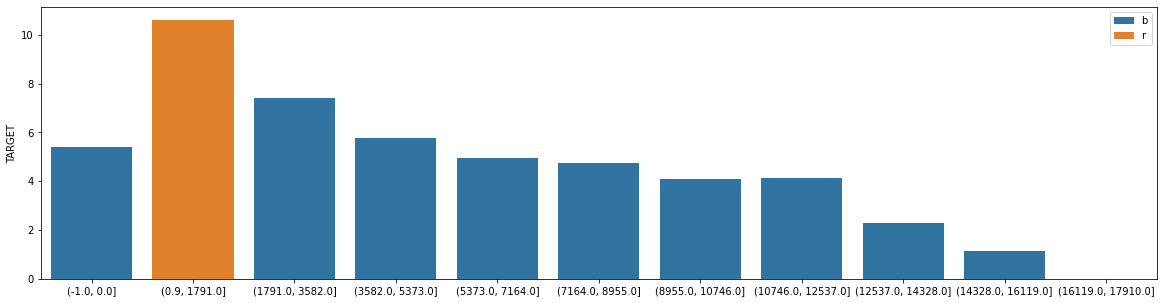

In [237]:
plt.figure(figsize=(20 , 5))
color = max_color(x=work_group['employed_group'] , y=work_group['TARGET'] , color=['r','b'])
sns.barplot([i for i in work_group['employed_group']], work_group['TARGET'] * 100 ,hue = color , dodge=False )
plt.legend()
plt.show()